In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
iris = load_iris(as_frame=True)
df = iris.frame
#you are making a column named species which will have the target_names (species names) instead of 1 2 3 (target)
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))
df= df.drop(columns="target")
print("Sample data:\n",df.head())

Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [23]:
#train/test split
X=df.drop("species",axis=1)
y=df["species"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#normalize
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
#train knn
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)


KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


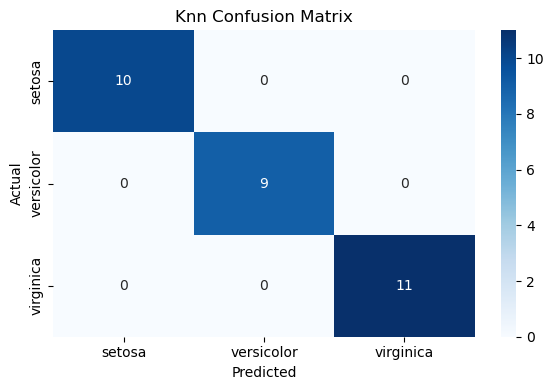

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues",xticklabels=knn.classes_,yticklabels=knn.classes_)
plt.title("Knn Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()